# Matrix Factorization using Bregman Divergenses

## Testing NMF class

In [1]:
from sklearn.decomposition import NMF as nmfsk
from MatrixFactorization import NMF as nmfmy
import numpy as np
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

## 1. Gamma Distribution with itakura-saito as Bregman Divergenses, Testing PHI

### 1.1 Selecting best way to represent Gamma Distribution with Non- negative Values

Gamma Distribution from definition does no take negative values.

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


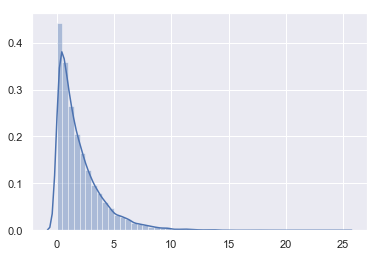

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
rs = RandomState(76321654)
shape, scale = 1, 2 
V = rs.gamma(shape,scale ,10000)
sns.set(color_codes=True)
sns.distplot(V)

### 1.2 Test NMF for Data coming from Gamma Distribution

In [3]:
import scipy
rs = RandomState(76321654)
shape, scale = 1, 2
V = rs.gamma(shape,scale ,10000).reshape(200,50)
n = 10
gamma = scipy.stats.distributions.gamma

#### LOG Likelihood 

In [4]:
def neg_log_gamma(V,W,H):
    logs_likelihoods = gamma.logpdf(V, W.dot(H))
    neg_logs = - logs_likelihoods
    return np.nansum(neg_logs)

### My Implementation Gamma

In [5]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gamma')
W, H = nmfM.fit_transform(V)
diffM = neg_log_gamma(V, W ,H)
print('Negative Log Likelihood Between Sklearn Results Between My Results and V :' + str(diffM))

Negative Log Likelihood Between Sklearn Results Between My Results and V :17599.840194543704


In [6]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gamma', phi_update = True)
W, H = nmfM.fit_transform(V)
diffM = neg_log_gamma(V, W ,H)
print('Negative Log Likelihood Between Sklearn Results Between My Results and V :' + str(diffM))

Negative Log Likelihood Between Sklearn Results Between My Results and V :17599.840194543704


### Compare the three Approaches

In [7]:
errorssk = np.zeros(50)
errorsNormal = np.zeros(50)
errorsGeneral = np.zeros(50)

lsk = np.zeros(50)
lmyNormal = np.zeros(50)
lmyGeneral = np.zeros(50)




for n in range(1, 51):
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
   
    #My 
    
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs,  distribution = 'gamma')
    W, H = nmfM.fit_transform(V)
    
    # My with Phi
    rs = RandomState(76321654)
    nmfMphi = nmfmy(n_components=n,random_state=rs,  distribution = 'gamma', phi_update=True)
    Wphi, Hphi = nmfMphi.fit_transform(V)
    
    
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
    diffS2 = mean_squared_error(V, W.dot(H))
    errorsNormal[n-1] = diffS2
    
    diffM = mean_squared_error(V, Wphi.dot(Hphi))
    errorsGeneral[n-1] = diffM
    
    
    # Average Negative log likelihood
    diffS = neg_log_gamma(V, Ws, Hs)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    
    diffM = neg_log_gamma(V, W, H)
    lmyNormal[n-1] = diffM / (V.shape[0] * V.shape[1])
    
  
    diffM2 = neg_log_gamma(V, Wphi , Hphi)
    lmyGeneral[n-1] = diffM2 / (V.shape[0] * V.shape[1])
    

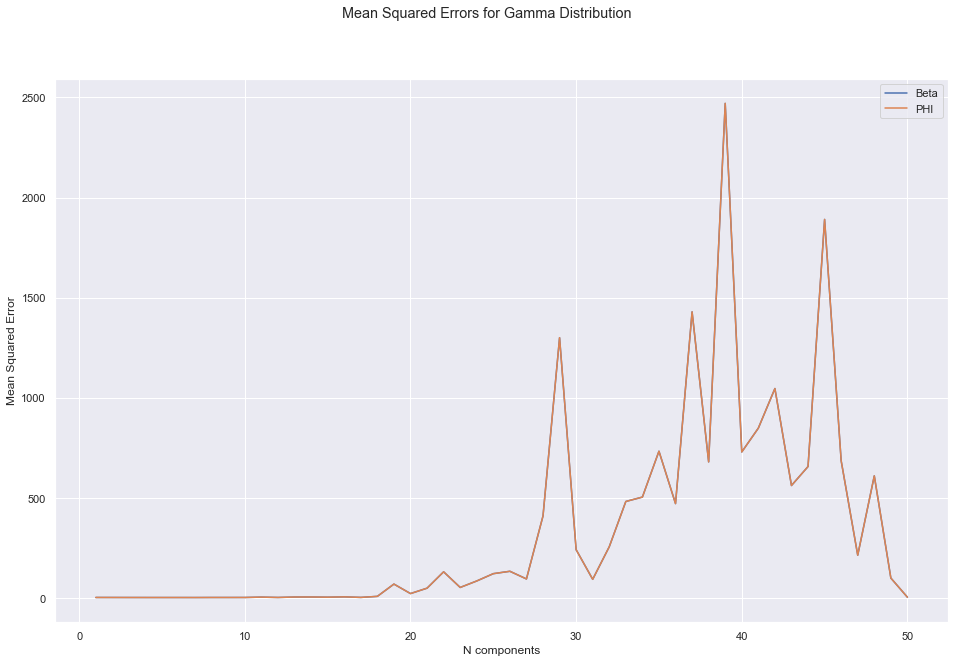

In [8]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorsNormal, label="Beta")
ax_1.plot(np.arange(1, 51), 
                  errorsGeneral, label="PHI")

ax_1.legend(loc=0)

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Gamma Distribution')
fig_1.savefig('MeanSquaredErrorsForNMFGammaPHI.pdf')

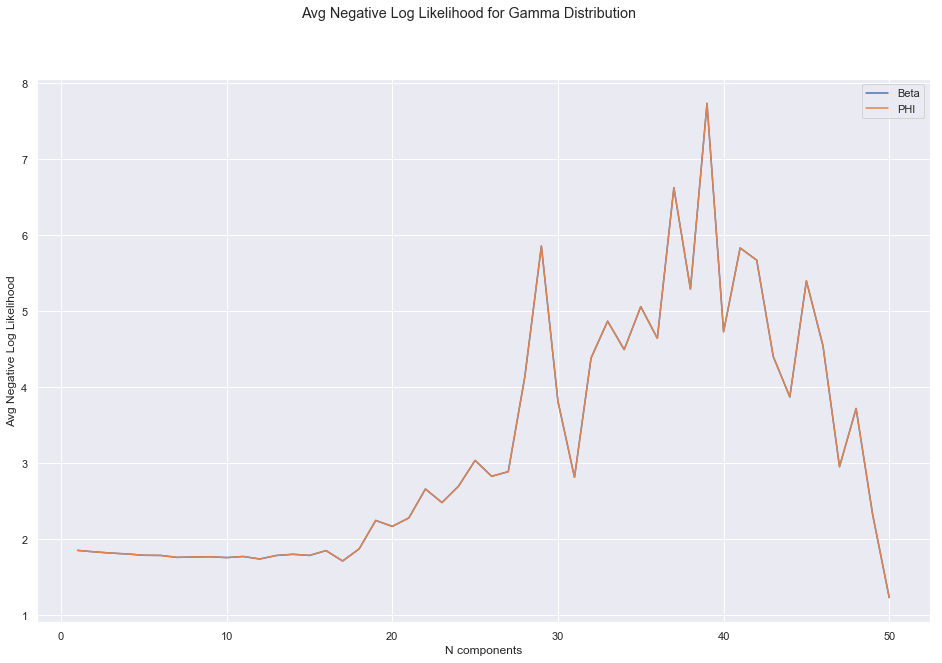

In [9]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lmyNormal, label="Beta")
ax_1.plot(np.arange(1, 51), 
                  lmyGeneral, label="PHI")

ax_1.legend(loc=0)

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Gamma Distribution')
fig_1.savefig('AverageNegLogLikelihoodForNMFGammaPHI.pdf')

#### Distribution compared to Mine with 10 components

Original Data mean: 1.9843414978777087 std: 1.9933389535134844
From Beta Data : 2.076905892568913 std: 1.4772695972904295
From Phi Data : 2.0769058925689134 std: 1.47726959729043


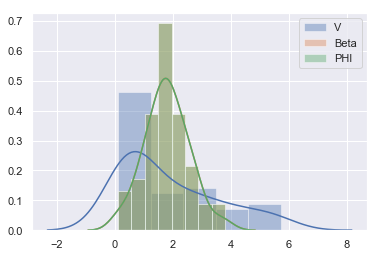

In [18]:
n = 10
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gamma')
W, H = nmfM.fit_transform(V)
sns.set(color_codes=True)
sns.distplot(V[4], label = 'V')
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
sns.distplot(W.dot(H)[4], label ='Beta')
print('From Beta Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gamma', phi_update=True)
W, H = nmfM.fit_transform(V)
sns.distplot(W.dot(H)[4], label ='PHI')
print('From Phi Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )



plt.legend()



#### Max Iterations effect

In [21]:
max_iterations = [10,50,100,200,400,800,1500,3000,10000,20000,50000]

errorsNormal = np.zeros(len(max_iterations))
errorsGeneral = np.zeros(len(max_iterations))

lmyNormal = np.zeros(len(max_iterations))
lmyGeneral = np.zeros(len(max_iterations))


n = 15
i = 0
for max_it in max_iterations:
    rs = RandomState(76321654)
    
  
   
    #My 
    
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs,  distribution = 'gamma', max_iterations = max_it)
    W, H = nmfM.fit_transform(V)
    
    # My with Phi
    rs = RandomState(76321654)
    nmfMphi = nmfmy(n_components=n,random_state=rs,  distribution = 'gamma', phi_update=True, max_iterations = max_it)
    Wphi, Hphi = nmfMphi.fit_transform(V)
    
    
    
    print('Iteration : ' + str(max_it))
    # Mean Squared Errors
    
    
    diffS2 = mean_squared_error(V, W.dot(H))
    errorsNormal[i] = diffS2
    print('Mean Square Error Beta : ' + str(diffS2))


    
    diffM = mean_squared_error(V, Wphi.dot(Hphi))
    errorsGeneral[i] = diffM
    print('Mean Square Error Normal : ' + str(diffM))
    
    
    # Average Negative log likelihood
    
    diffM = neg_log_gamma(V, W, H)
    lmyNormal[i] = diffM / (V.shape[0] * V.shape[1])
    print('Avera Negative Log Likelihood Beta : ' + str(lmyNormal[i]))


    diffM2 = neg_log_gamma(V, Wphi , Hphi)
    lmyGeneral[i] = diffM2 / (V.shape[0] * V.shape[1])
    print('Avera Negative Log Likelihood Phi : ' + str(lmyGeneral[i]))

    i += 1


Iteration : 10
Mean Square Error Beta : 3.144471317495095
Mean Square Error Normal : 3.144471317495095
Avera Negative Log Likelihood Beta : 1.648876906457527
Avera Negative Log Likelihood Phi : 1.648876906457527
Iteration : 50
Mean Square Error Beta : 4.88234517570665
Mean Square Error Normal : 4.882345175706651
Avera Negative Log Likelihood Beta : 1.758049102105977
Avera Negative Log Likelihood Phi : 1.758049102105977
Iteration : 100
Mean Square Error Beta : 5.3710408277141175
Mean Square Error Normal : 5.371040827714117
Avera Negative Log Likelihood Beta : 1.7963250089511322
Avera Negative Log Likelihood Phi : 1.7963250089511318
Iteration : 200
Mean Square Error Beta : 5.284568813595004
Mean Square Error Normal : 5.284568813595001
Avera Negative Log Likelihood Beta : 1.7884452962209416
Avera Negative Log Likelihood Phi : 1.7884452962209412
Iteration : 400
Mean Square Error Beta : 5.73997465684762
Mean Square Error Normal : 5.7399746568474805
Avera Negative Log Likelihood Beta : 1.804